# 4. Research Methodology

This section includes the steps in feature engineering and feature selection.

### 4.1 Feature Engineering

#### 4.1.2 Further consolidating the dataset

In [94]:
# Categorize countries in Developed and Developing countries

developedcountries = ["Norway", "Switzerland",  "Ireland", "Hong Kong", "Iceland", "Germany", "Sweden", 
                    "Australia", "Netherlands", "Denmark","Singapore", 
                    "Finland", "United Kingdom", "Belgium", "New Zealand", "Canada", "United States", 
                    "Austria", "Japan", "Israel", "Liechtenstein","Slovenia","South Korea", "Luxembourg", 
                    "Spain", "France", "Malta", "Italy", "Estonia", "United Arab Emirates", "Greece","Cyprus",
                    "Lithuania",  "Poland", "Andorra","Latvia", "Portugal","Slovakia", "Saudi Arabia", "Hungary",
                    "Bahrain", "Chile", "Croatia", "Qatar", "Argentina", "Montenegro", "Romania","Palau",
                    "Kazakhstan","Russia","Belarus", "Turkey","Uruguay", "Bulgaria", "Panama","Bahamas",
                    "Barbados","Oman","Georgia", "Malaysia","Costa Rica", "Serbia","Kuwait", "Mauritius"]
    
developingcountries = [ "Trinidad and Tobago","Seychelles", "Albania", "Iran", "Cuba", "Sri Lanka",
                        "Bosnia and Herzegovina", "Mexico", "Ukraine", "Grenada", "Saint Kitts and Nevis", 
                        "Antigua and Barbuda", "Thailand", "Peru", "Armenia", "North Macedonia", "Colombia", 
                        "Brazil", "China", "Ecuador", "Saint Lucia", "Dominican Republic","Azerbaijan", "Moldova",
                        "Algeria", "Lebanon", "Fiji", "Dominica", "Tunisia", "Maldives", "Suriname",
                        "Saint Vincent and the Grenadines", "Mongolia", "Botswana", "Jamaica", "Jordan", "Paraguay",
                        "Tonga","Libya","Uzbekistan","Indonesia", "Philippines", "Bolivia","Belize", "Turkmenistan", 
                        "Samoa", "Venezuela", "South Africa","Palestine", "Egypt","Vietnam", "Marshall Islands", 
                        "Gabon","Kyrgyzstan", "Morocco", "Guyana", "Iraq", "El Salvador", "Tajikistan", "Guatemala",
                        "Nicaragua", "Bhutan", "Namibia","India", "Honduras", "Bangladesh","Kiribati", "Sao Tome and Principe",
                        "Micronesia", "Laos", "Ghana", "Eswatini", "Vanuatu", "Timor-Leste", "Nepal", "Kenya","Cambodia", 
                        "Equatorial Guinea", "Zambia","Myanmar", "Angola","Republic of the Congo","Zimbabwe", "Syria", 
                        "Solomon Islands", "Cameroon", "Pakistan","Papua New Guinea","Comoros","Mauritania","Benin",
                        "Uganda","Rwanda","Nigeria","Ivory Coast","Tanzania", "Madagascar", "Lesotho","Djibouti", 
                        "Togo", "Senegal", "Afghanistan", "Sudan", "Haiti", "Gambia", "Ethiopia", "Malawi", "DR Congo",
                        "Liberia", "Guinea-Bissau", "Guinea", "Yemen", "Eritrea","Mozambique", "Burkina Faso",  
                        "Sierra Leone", "Mali","Burundi", "South Sudan", "Chad","Central African Republic","Niger"]

developing = '|'.join(developingcountries).lower()
developed = '|'.join(developedcountries).lower()

# Create Binary columns
df.loc[(df['Listed Location Countries'].str.contains(developing, case = False)),'Developing countries (Y/N)'] = 1
df.loc[df['Developing countries (Y/N)'] != 1,'Developing countries (Y/N)'] = 0

df.loc[(df['Listed Location Countries'].str.contains(developed, case = False)),'Developed countries (Y/N)'] = 1
df.loc[df['Developed countries (Y/N)'] != 1,'Developed countries (Y/N)'] = 0


In [95]:
# Categorize Minimum Age Eligibility into 2 groups - infants and teenagers
infantslist = ['1 ', '3 ', '2 ', '5 ', '6 ', '< 1 ', '4 ', '7 ', '9 ', '8 ', '11 ']

infants = '|'.join(infantslist).lower()

# Create binary columns
df.loc[(df['Age (min) years'].str.contains(infants, case = False)),'Age (min) years'] = 'Infants'
df.loc[df['Age (min) years'] != 'Infants','Age (min) years'] = 'Teenager'


#### 4.1.2 Outlier Analysis

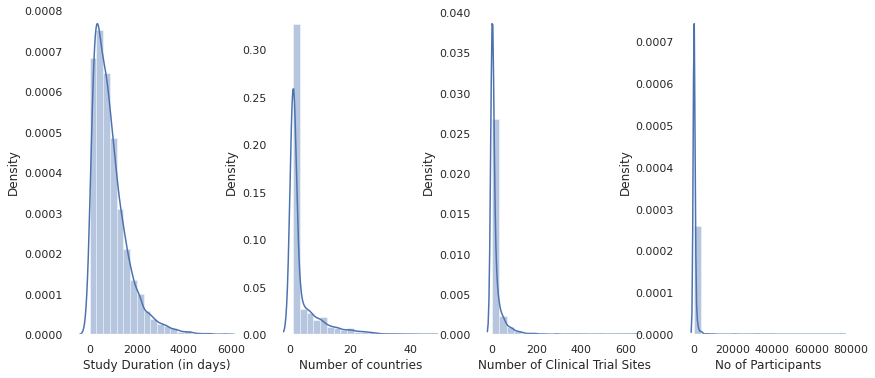

In [96]:
#check the normal distribution of the target variable
interventional_studies = df.copy()
plt.figure(figsize = (14,6))
plt.subplot(1,4,1)
sns.distplot(interventional_studies['Study Duration (in days)'], bins = 20)
plt.subplot(1,4,2)
sns.distplot(interventional_studies['Number of countries'], bins = 20)
plt.subplot(1,4,3)
sns.distplot(interventional_studies['Number of Clinical Trial Sites'], bins = 20)
plt.subplot(1,4,4)
sns.distplot(interventional_studies['No of Participants'], bins = 20)
plt.show()


In [97]:
#Identify the extreme outliers
q = interventional_studies['No of Participants'].quantile(0.99)
print('The 99 quantile of the number of participants: ', q)


The 99 quantile of the number of participants:  4530.799999999996


In [98]:
# drop the extreme outliers
interventional_studies = interventional_studies[interventional_studies['No of Participants'] < q]


In [99]:
# Save the final dataset
interventional_studies.to_excel('/project/Python/finaldataset.xlsx')


In [100]:
# Drop columns that are solely created for EDA purpose
# Define X and Y variables

# Features
Features = interventional_studies.loc[:, ~interventional_studies.columns.isin([
                                        'Outcome Measures - No', 'Republic of',
                                        'Outcome Measures - patient diary',
                                        'Outcome Measures - questionnaire',
                                        'Outcome Measures (Y/N)','TRIAL ID (NCT number)',
                                        'Intervention Types','Listed Location Countries',
                                        'BRIEF SUMMARY','CONDITION/DISEASE','SPONSOR','Collaborators',
                                        'Study Arms', 'Study Type','INTERVENTION Procedure - No',
                                        'INTERVENTION Biological', 'INTERVENTION Drug',
                                        'INTERVENTION Diagnostic Test', 'INTERVENTION Device',
                                        'INTERVENTION Dietary Supplement', 'INTERVENTION Radiation',
                                        'INTERVENTION Behavioral','Drug/Biological Delivery',
                                        'Number of Clinical Trial Sites_bins','Participant size_bins',
                                        'Study Duration_bins','Number of countries_bins','Outcome Measures',
                                        'CONDITION/DISEASE_cleaned','Big Names Collaborators',
                                        'Drug/Biological Delivery - Nil','INTERVENTION Procedure',
                                        'Actual/Estimated Study Start Date','Free Text','Big Names Sponsors',
                                        'Actual/Estimated Study Completion Date','Algeria','Angola','Argentina',
                                        'Australia','Austria','Bangladesh','Belarus', 'Belgium', 'Armenia',
                                        'Belize', 'Benin', 'Bolivia','Bosnia and Herzegovina', 'Réunion',
                                        'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 
                                        'Canada', 'Central African Republic','Chile', 'China', 'Colombia','Congo',
                                        'Costa Rica','Croatia', 'Czech Republic', 'Czechia','Côte DIvoire', 'Denmark', 
                                        'Dominican Republic','Egypt','El Salvador', 'Equatorial Guinea', 'Estonia', 'Ethiopia',
                                        'Faroe Islands', 'Federated States of Micronesia','Finland','Former Serbia and Montenegro',
                                        'France','French Guiana', 'Gabon','Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
                                        'Guatemala', 'Guinea','Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India','Indonesia', 
                                        'Iran', 'Ireland', 'Islamic Republic of', 'Israel','Italy', 'Jamaica','Japan','Jordan',
                                        'Kazakhstan', 'Kenya', 'Korea', 'Kuwait', 'Latvia', 'Lebanon','Lithuania', 'Luxembourg',
                                        'Macedonia', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Mauritius', 'Mexico', 'Moldova',
                                        'Montenegro', 'Morocco', 'Mozambique', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 
                                        'Niger', 'Nigeria','North Macedonia', 'Norway','Not Provided', 'Oman', 'Pakistan', 'Panama', 'Peru', 
                                        'Philippines', 'Poland', 'Portugal', 'Puerto Rico','Qatar', 'Republic of', 'Romania', 'Russian Federation', 
                                        'Saudi Arabia','Senegal', 'Serbia', 'Sierra Leone', 'Tunisia', 'Turkey', 'Uganda', 'Ukraine',
                                        'Singapore','Slovakia','Slovenia', 'South Africa', 'Spain', 'Sri Lanka','Sweden', 'Switzerland',
                                        'Taiwan', 'Tanzania', 'Thailand', 'The Democratic Republic of the','The Former Yugoslav Republic of',
                                        'United Arab Emirates', 'United Kingdom', 'United States', 'Uzbekistan', 'Vanuatu', 'Vietnam',
                                        'Virgin Islands (U.S.)', 'Zambia','Zimbabwe','Albania','Guadeloupe','Lesotho','Martinique','Swaziland'])]

X = np.asarray(Features)

# 2 output labels
Target_Variable = interventional_studies[[
                  'Outcome Measures - patient diary',
                  'Outcome Measures - questionnaire']]

Y = np.asarray(Target_Variable)


In [101]:
# check the number of features
print('Number of columns remained in the dataset:',len(Features.columns))


Number of columns remained in the dataset: 60


#### 4.1.3 Train Test Split


In [102]:
# Split the dataset by MultilabelStratifiedShuffleSplit with 10-fold CV

# Set the train test split to 7:3
mskf = MultilabelStratifiedShuffleSplit(n_splits = 10, test_size = 0.3, random_state = 0)
all_dis = np.zeros(shape = (2,))
all_dis2 = np.zeros(shape = (2,))

cnt = 1
cnt2 = 1

for train_index, test_index in mskf.split(X, Y):
    iter_dis = np.zeros(shape = (2,))
    iter_dis2 = np.zeros(shape = (2,))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    # train dataset
    y_train_new = pd.DataFrame(data = y_train, columns = Target_Variable.columns)
    X_train_new = pd.DataFrame(data = X_train, columns = Features.columns)
    df_train = pd.concat([pd.DataFrame(X_train_new),pd.DataFrame(y_train_new)],axis = 1)

    # test dataset
    y_test_new = pd.DataFrame(data = y_test, columns = Target_Variable.columns)
    X_test_new = pd.DataFrame(data = X_test, columns = Features.columns)
    df_test = pd.concat([pd.DataFrame(X_test_new),pd.DataFrame(y_test_new)],axis = 1)

#### 4.1.4 Imputation of missing values

In [103]:
# Check the total number of rows
total = len(interventional_studies)

# Check the percentage of missing values in the categorical columns
# Study Phase
a = len(interventional_studies[(interventional_studies['Phase'] == 'Not Provided') |
                               (interventional_studies['Phase'] == 'Not Applicable')])/total
print('% of missing value in Phase is: ', a)

# Allocation
b = len(interventional_studies[(interventional_studies['Allocation'] == 'Not Provided')])/total
print('% of missing value in Allocation is: ', b)

# Masking Type
c = len(interventional_studies[(interventional_studies['Masking'] == 'Not Provided')])/total
print('% of missing value in Masking is: ', c)

# Primary Purpose
d = len(interventional_studies[(interventional_studies['Primary Purpose'] == 'Not Provided')])/total
print('% of missing value in Primary Purpose is: ', d)

# Intervention Model
e = len(interventional_studies[(interventional_studies['Intervention Model'] == 'Not Provided')])/total
print('% of missing value in Intervention Model is: ', e)

# Minimum Age
f = len(interventional_studies[interventional_studies['Age (min) years'] == 'Not Provided'])/total
print('% of missing value in Minimum Age is: ', f)

# Maximum Age
f = len(interventional_studies[interventional_studies['Age (max) years'] == 'Not Provided'])/total
print('% of missing value in Maximum Age is: ', f)


% of missing value in Phase is:  0.20965189873417722
% of missing value in Allocation is:  0.3380801687763713
% of missing value in Masking is:  0.0005274261603375527
% of missing value in Primary Purposeis:  0.004219409282700422
% of missing value in Intervention Model is:  0.0010548523206751054
% of missing value in Minimum Age is:  0.0
% of missing value in Maximum Age is:  0.2399789029535865


In [104]:
# Impute the missing values with mode value

def impute_nan_most_frequent_category(DataFrame,Columns):
    for ColName in Columns:
        most_frequent_category = DataFrame[(DataFrame[ColName] != 'Not Provided') & 
                                           (DataFrame[ColName] != 'Not Applicable')][ColName].mode()[0]
        DataFrame[ColName + "_Imputed"] = DataFrame[ColName].replace('Not Provided', most_frequent_category, regex=True
                                                                    ).replace('Not Applicable', most_frequent_category, regex=True)

# Imputation
impute_nan_most_frequent_category(df_train,['Phase','Allocation','Intervention Model','Masking',
                                            'Age (min) years','Primary Purpose','Age (max) years'])
impute_nan_most_frequent_category(df_test,['Phase','Allocation','Intervention Model','Masking',
                                           'Age (min) years','Primary Purpose','Age (max) years'])

# Drop the original columns
df_train_2 = df_train.drop(columns = ['Phase','Allocation','Intervention Model',
                           'Masking','Primary Purpose','Age (min) years','Age (max) years'])   

df_test_2 = df_test.drop(columns = ['Phase','Allocation','Intervention Model',
                           'Masking','Primary Purpose','Age (min) years','Age (max) years']) 

#### 4.1.5 Encoding the Categorical Variables

In [105]:
# Covert the categorical columns into binary columns using Ordinal Encoding 

# year started
df_train_2['Year Started'] = df_train_2['Year Started'].astype(str)
df_train_2['Year Started'] = df_train_2['Year Started'].replace('2012','0').replace(
                              '2013','1').replace('2014','2').replace('2015','3').replace(
                              '2016','4').replace('2017','5').replace('2018','6').replace(
                              '2019','7').replace('2020','8').replace('2021','9').replace(
                              '2022','10')
df_test_2['Year Started'] = df_test_2['Year Started'].astype(str)
df_test_2['Year Started'] = df_test_2['Year Started'].replace('2012','0').replace(
                              '2013','1').replace('2014','2').replace('2015','3').replace(
                              '2016','4').replace('2017','5').replace('2018','6').replace(
                              '2019','7').replace('2020','8').replace('2021','9').replace(
                              '2022','10')

# Study phase
phase_mapping = {'Phase 4':'7',
                 'Phase 3': '5',
                 'Phase 2,Phase 3':'4',
                 'Phase 1,Phase 2':'2',
                 'Phase 1':'1',
                 'Phase 2':'3',
                 'Early Phase 1':'0',
                 'Early 1':'0',
                  '3.5':'6'}
# Recruitment status
status_mapping = {'Not yet recruiting' : '0',
                  'Recruiting' : '1' ,
                  'Enrolling by invitation' : '2',
                  'Active, not recruiting': '3',
                  'Completed' : '4',}

# Maximum age
age_mapping = {'> 15 ' : '1',
             '<= 15 ' : '0'}

# Minimum Age
min_mapping = {'Infants' : '0',
             'Teenager' : '1'}

# Replace the categorical variables with numbers
def mapping(df):
    for i, j in status_mapping.items():
        df['STATUS (active/recruiting)'] = df['STATUS (active/recruiting)'].replace(i, j)
    for a, b in phase_mapping.items():
        df['Phase_Imputed'] = df['Phase_Imputed'].replace(a, b)
    for c, d in age_mapping.items():
        df['Age (max) years_Imputed'] = df['Age (max) years_Imputed'].replace(c, d)
    for e, f in min_mapping.items():
        df['Age (min) years_Imputed'] = df['Age (min) years_Imputed'].replace(e, f)
mapping(df_test_2)
mapping(df_train_2)

In [106]:
# Convert Categorical variables into binary columns using OneHotEncoder
 
def onehotencoding(df,df2):
    df['Allocation_Imputed'] = df['Allocation_Imputed'].astype('category')
    df['Masking_Imputed'] = df['Masking_Imputed'].astype('category')
    df['Intervention Model_Imputed'] = df['Intervention Model_Imputed'].astype('category')
    df['Primary Purpose_Imputed'] = df['Primary Purpose_Imputed'].astype('category')
    df['Big Names Sponsors (Y/N)'] = df['Big Names Sponsors (Y/N)'].astype('category')
    df['Big Names Collaborators (Y/N)'] = df['Big Names Collaborators (Y/N)'].astype('category')
    df['Disease Type'] = df['Disease Type'].astype('category')
    df['Gender'] = df['Gender'].astype('category')

    df2['Allocation_Imputed'] = df2['Allocation_Imputed'].astype('category')
    df2['Masking_Imputed'] = df2['Masking_Imputed'].astype('category')
    df2['Intervention Model_Imputed'] = df2['Intervention Model_Imputed'].astype('category')
    df2['Primary Purpose_Imputed'] = df2['Primary Purpose_Imputed'].astype('category')
    df2['Big Names Sponsors (Y/N)'] = df2['Big Names Sponsors (Y/N)'].astype('category')
    df2['Big Names Collaborators (Y/N)'] = df2['Big Names Collaborators (Y/N)'].astype('category')
    df2['Disease Type'] = df2['Disease Type'].astype('category')
    df2['Gender'] = df2['Gender'].astype('category')
    
    #Assigning numerical values and storing it in another columns
    df['Allocation_new'] = df['Allocation_Imputed'].cat.codes
    df['Masking_new'] = df['Masking_Imputed'].cat.codes
    df['Intervention Model_new'] = df['Intervention Model_Imputed'].cat.codes
    df['Primary Purpose_new'] = df['Primary Purpose_Imputed'].cat.codes
    df['Big Names Sponsors_new'] = df['Big Names Sponsors (Y/N)'].cat.codes
    df['Big Names Collaborators_new'] = df['Big Names Collaborators (Y/N)'].cat.codes
    df['Disease Type_new'] = df['Disease Type'].cat.codes
    df['Gender_new'] = df['Gender'].cat.codes
    
    df2['Allocation_new'] = df2['Allocation_Imputed'].cat.codes
    df2['Masking_new'] = df2['Masking_Imputed'].cat.codes
    df2['Intervention Model_new'] = df2['Intervention Model_Imputed'].cat.codes
    df2['Primary Purpose_new'] = df2['Primary Purpose_Imputed'].cat.codes
    df2['Big Names Sponsors_new'] = df2['Big Names Sponsors (Y/N)'].cat.codes
    df2['Big Names Collaborators_new'] = df2['Big Names Collaborators (Y/N)'].cat.codes
    df2['Disease Type_new'] = df2['Disease Type'].cat.codes
    df2['Gender_new'] = df2['Gender'].cat.codes

    #Create an instance of One-hot-encoder
    mlb = OneHotEncoder()
    #Passing encoded columns
    mlb_data = pd.DataFrame(mlb.fit_transform(df[['Primary Purpose_new','Intervention Model_new',
                                                'Masking_new','Allocation_new','Gender_new',
                                                'Big Names Sponsors_new','Disease Type_new',
                                                'Big Names Collaborators_new']]))
    mlb_data_test = pd.DataFrame(mlb.transform(df2[['Primary Purpose_new','Intervention Model_new',
                                                'Masking_new','Allocation_new','Gender_new',
                                                'Big Names Sponsors_new','Disease Type_new',
                                                'Big Names Collaborators_new']]))

    #Merge with main dataset
    df = df.join(mlb_data)
    df2 = df2.join(mlb_data_test)
    return df,df2

onehotencoding(df_train_2,df_test_2)


(     STATUS (active/recruiting) Gender No of Participants Study Duration (in days) Year Started  \
 0                             4    All                200                      396            0   
 1                             4    All                 86                      774            1   
 2                             4    All                310                      236            0   
 3                             4    All                  9                     2693            2   
 4                             4    All                 46                     1163            2   
 ...                         ...    ...                ...                      ...          ...   
 2649                          1    All                100                     1278            7   
 2650                          4    All                 93                       68            9   
 2651                          4    All                210                      653            7   


In [107]:
# Remove the unencoded columns
df_train_new = df_train_2.drop(columns = ['Primary Purpose_Imputed','Intervention Model_Imputed',
                                          'Masking_Imputed', 'Allocation_Imputed','Gender',
                                          'Big Names Sponsors (Y/N)','Disease Type','Big Names Collaborators (Y/N)'])
df_test_new = df_test_2.drop(columns = ['Primary Purpose_Imputed','Intervention Model_Imputed',
                                        'Masking_Imputed', 'Allocation_Imputed','Gender',
                                        'Big Names Sponsors (Y/N)', 'Disease Type','Big Names Collaborators (Y/N)'])

In [108]:
# Convert all features into integers
def convertcolumntype(df):
    for col_name in df.columns:
        if(df[col_name].dtypes.name != 'int64'):
            df[col_name] = df[col_name].astype('int64')

convertcolumntype(df_test_new)
convertcolumntype(df_train_new)

In [109]:
# Merge the train and test set into one
data_sampled = pd.concat([pd.DataFrame(df_train_new),pd.DataFrame(df_test_new)],axis=0)

# Define X, Y, training and testing sets
X_sampled = data_sampled.loc[:, ~data_sampled.columns.isin([
                                'Outcome Measures - patient diary',
                                'Outcome Measures - questionnaire'])]

y_sampled = data_sampled[['Outcome Measures - patient diary',
                          'Outcome Measures - questionnaire']]

X_train_2 = df_train_new.loc[:, ~df_train_new.columns.isin([
                                'Outcome Measures - patient diary',
                                'Outcome Measures - questionnaire'])]

y_train_2 = df_train_new[['Outcome Measures - patient diary',
                          'Outcome Measures - questionnaire']]

X_test_2 = df_test_new.loc[:, ~df_test_new.columns.isin([
                                'Outcome Measures - patient diary',
                                'Outcome Measures - questionnaire'])]

y_test_2 = df_test_new[['Outcome Measures - patient diary',
                          'Outcome Measures - questionnaire']]

# convert all columns into integers
convertcolumntype(X_sampled)
convertcolumntype(y_sampled)
convertcolumntype(X_train_2)
convertcolumntype(y_train_2)
convertcolumntype(X_test_2)
convertcolumntype(y_test_2)


#### 4.1.6 Box-Cox Transformation to fix the normality of the dataset

In [110]:
# Identify the numerical varaibles in the dataset 
numerical = X_train_2[['No of Participants','Study Duration (in days)','Number of countries',
                       'Number of Clinical Trial Sites']]

# Check the skewness 
skewness = numerical.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness_df = pd.DataFrame({'Skewness': skewness}) 
skewness_df.head(10)


,Skewness
Number of Clinical Trial Sites,7.556151
No of Participants,4.061012
Number of countries,2.613443
Study Duration (in days),1.625639


In [111]:
# use Box-Cox transformation on the features with high "skewness". 
# use a value of lambda of 0.1.

boxcox_features = skewness_df[np.abs(skewness_df['Skewness'])>1].index 
for col in boxcox_features:
    X_train_2.loc[:, col] = boxcox1p(X_train_2[col], 0.1)
    X_test_2.loc[:, col] = boxcox1p(X_test_2[col], 0.1)
    

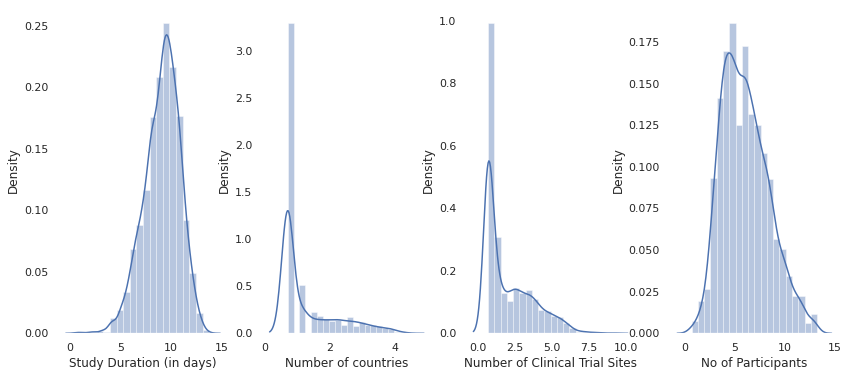

In [112]:
#check the normal distribution of the target variable in the train set

plt.figure(figsize = (14,6))
plt.subplot(1,4,1)
sns.distplot(X_train_2['Study Duration (in days)'], bins = 20)
plt.subplot(1,4,2)
sns.distplot(X_train_2['Number of countries'], bins = 20)
plt.subplot(1,4,3)
sns.distplot(X_train_2['Number of Clinical Trial Sites'], bins = 20)
plt.subplot(1,4,4)
sns.distplot(X_train_2['No of Participants'], bins = 20)
plt.show()


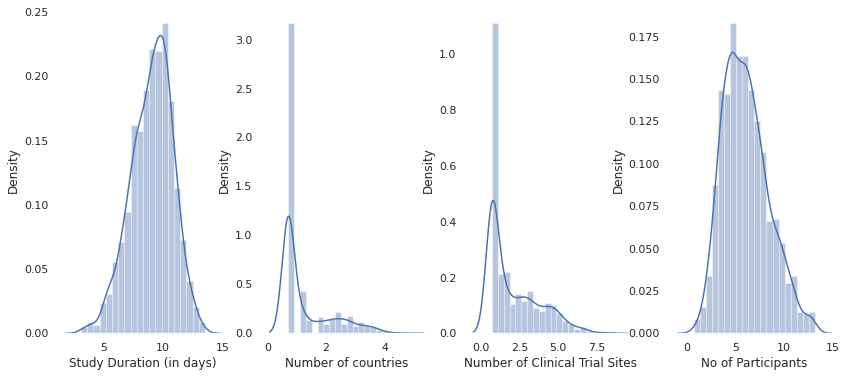

In [113]:
#check the normal distribution of the target variable in the test set

plt.figure(figsize = (14,6))
plt.subplot(1,4,1)
sns.distplot(X_test_2['Study Duration (in days)'], bins = 20)
plt.subplot(1,4,2)
sns.distplot(X_test_2['Number of countries'], bins = 20)
plt.subplot(1,4,3)
sns.distplot(X_test_2['Number of Clinical Trial Sites'], bins = 20)
plt.subplot(1,4,4)
sns.distplot(X_test_2['No of Participants'], bins = 20)
plt.show()


#### 4.1.7 MinMaxScaler to rescale the column values

In [114]:
# MinMaxScaler
scaler = MinMaxScaler()
X_train_2[['Study Duration (in days)','Number of countries','Number of Clinical Trial Sites','No of Participants']]= scaler.fit_transform(
    X_train_2[['Study Duration (in days)','Number of countries','Number of Clinical Trial Sites','No of Participants']])

X_test_2[['Study Duration (in days)','Number of countries','Number of Clinical Trial Sites','No of Participants']]= scaler.transform(
    X_test_2[['Study Duration (in days)','Number of countries','Number of Clinical Trial Sites','No of Participants']])


In [115]:
# Merging the scaled dataset together
df_train_new = pd.concat([pd.DataFrame(X_train_2),pd.DataFrame(y_train_2)],axis = 1)
df_test_new = pd.concat([pd.DataFrame(X_test_2),pd.DataFrame(y_test_2)],axis = 1)
dataset_new = pd.concat([df_train_new,df_test_new],axis = 0)

# Saving a copy of the datasets to faculty
df_train_new.to_excel('/project/Python/trainset.xlsx')
df_test_new.to_excel('/project/Python/testset.xlsx')
dataset_new.to_excel('/project/Python/finaldataset_scaled.xlsx')

### 4.2 Feature Selection

#### 4.2.1 Method 1 - Filter Method (Anova F Score)

In [116]:
# Calculate the F-score between features and output variable 1 - Patient Diary using SelectKBest
labels = ['Outcome Measures - patient diary'] 

for label in labels:
    selector = SelectKBest(f_classif, k = 'all')
    selector.fit(X_train_2, y_train_2[label])
    feature_names = X_train_2.columns.values[selector.get_support()]
    scores = selector.pvalues_[selector.get_support()].round(3)
    names_scores = list(zip(feature_names, scores))
    
    # Create dataframe      
    ns_df = pd.DataFrame(data = names_scores, columns = ['Variable', 'p-values'])
    ns_df = ns_df.sort_values(ascending = False,by = 'p-values')
    
# Return features if the p-value is less than 0.05
ns_df.loc[ns_df['p-values'] <= 0.05].reset_index().drop(columns = 'index')

,Variable,p-values
0,INTERVENTION Procedure - electrocardiogram,0.042
1,INTERVENTION Procedure - electroencephalogram,0.026
2,INTERVENTION Procedure - physical examination,0.019
3,INTERVENTION Procedure - blood collection,0.016
4,INTERVENTION Procedure - urinalysis,0.016
5,Age (max) years_Imputed,0.013
6,Number of countries,0.007
7,Drug/Biological Delivery - inhalation,0.001
8,Intervention Model_new,0.001
9,Allocation_new,0.001


In [117]:
# Calculate the F-score between features and output variable 2 - questionnaire

labels = ['Outcome Measures - questionnaire'] 

for label in labels:
    selector = SelectKBest(f_classif, k = 'all')
    selector.fit(X_train_2, y_train_2[label])
    feature_names = X_train_2.columns.values[selector.get_support()]
    scores = selector.pvalues_[selector.get_support()].round(3)
    names_scores = list(zip(feature_names, scores))
    
    # Create dataframe
    ns_df = pd.DataFrame(data = names_scores, columns = ['Variable', 'p-values'])
    ns_df = ns_df.sort_values(ascending = False,by='p-values')

# Return features if the p-value is less than 0.05
ns_df.loc[ns_df['p-values'] <= 0.05].reset_index().drop(columns = 'index')

,Variable,p-values
0,INTERVENTION Procedure - xray,0.034
1,Drug/Biological Delivery - oral,0.028
2,Drug/Biological Delivery - nasal,0.028
3,Drug/Biological Delivery - cutaneous,0.015
4,Primary Purpose_new,0.014
5,Intervention Model_new,0.009
6,INTERVENTION Procedure - implantation,0.008
7,Age (min) years_Imputed,0.006
8,Study Duration (in days),0.006
9,INTERVENTION Procedure - aphaeresis,0.006


####  4.2.2 Method 2 - Embedded Method (Multi-Label Decision Tree)

In [118]:
#plot a multi-label decision tree
model = DecisionTreeClassifier(splitter = "best",random_state = 42) # split node by best attribute
model.fit(X_train_2, y_train_2)
DT_pred = model.predict(X_test_2)

# Check the number of features with a feature importance greater than 0.02
importance = model.feature_importances_
for i,v in enumerate(importance):
    if v>0.02:
        print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.03084
Feature: 1, Score: 0.12204
Feature: 2, Score: 0.12541
Feature: 3, Score: 0.06437
Feature: 5, Score: 0.08094
Feature: 6, Score: 0.06176
Feature: 8, Score: 0.02559
Feature: 49, Score: 0.02992
Feature: 53, Score: 0.03188
Feature: 55, Score: 0.03238
Feature: 58, Score: 0.06725


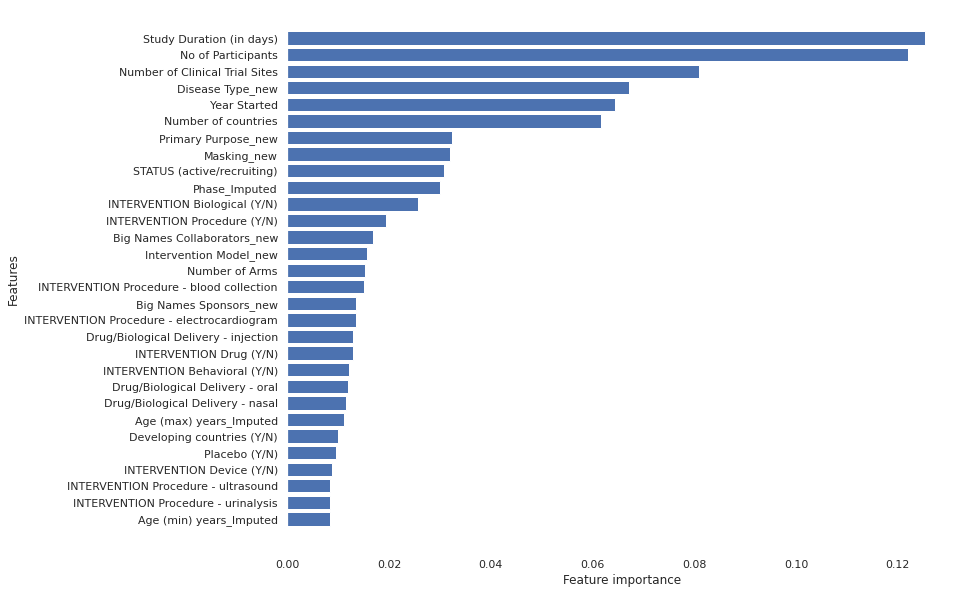

In [121]:
plt.rcParams["figure.figsize"] = (12, 10)

# plot the decision tree 
def plot_features(columns, importances, n = 30): #set the number of features to 30
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances}).sort_values("feature_importances", ascending=False).reset_index(drop=True))
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

plot_features(X_train_2.columns,model.feature_importances_)


#### Final Features Selected: 

1. 'Disease Type_new'
2. 'Placebo (Y/N)' 
3. 'Year Started'
4. 'Primary Purpose_new'
5. 'Phase_Imputed'
6. 'Masking_new'
7. 'Intervention Model_new'
8. 'Number of Clinical Trial Sites'
9. 'Age (min) year'
10. 'Study Duration (in days)'
11. 'Number of Participants'
12. 'INTERVENTION Behavioral (Y/N)'
13. 'INTERVENTION Procedure - blood collection'
14. 'INTERVENTION Procedure - electrocardiogram'
15. 'INTERVENTION Procedure - urinalysis'
16. 'Drug/Biological Delivery - oral'
17. 'Drug/Biological Delivery - injection'
18. 'Drug/Biological Delivery - nasal'
19. 'INTERVENTION Device (Y/N)'
20. 'Developing countries (Y/N)'
21. 'INTERVENTION Biological (Y/N)'
22. 'Age (max) year'
23. 'Number of Countries'


#### 4.2.3 Check the multicollinearity of features

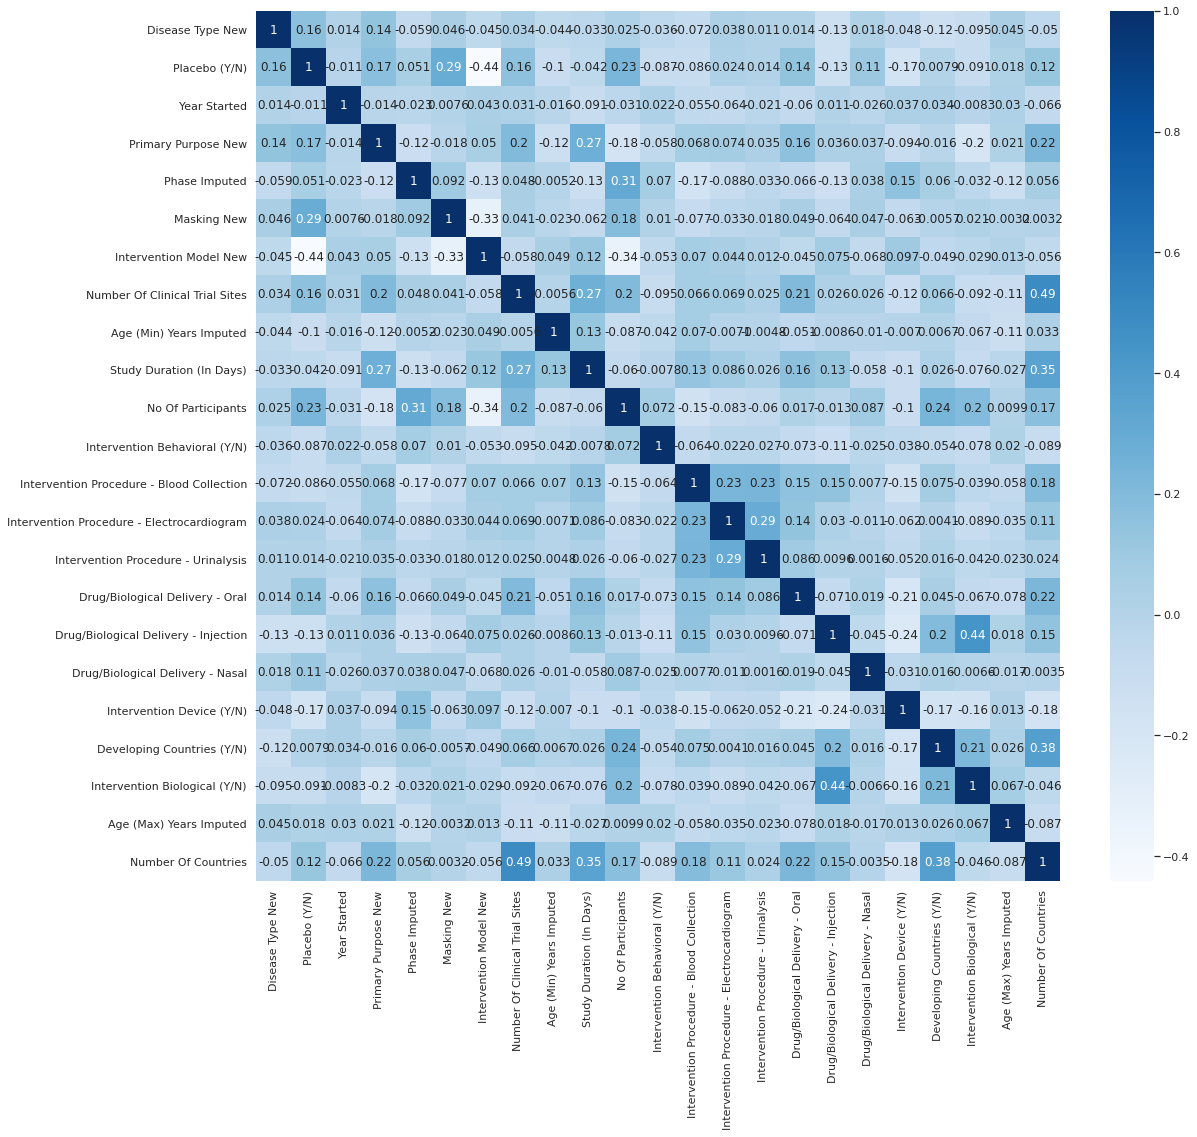

In [128]:
# Check the correlation of features in the final subset 
# dataset_final = dataset_new[['STATUS (active/recruiting)','Disease Type_new',
#                              'Big Names Sponsors_new','Placebo (Y/N)',
#                              'Year Started','Primary Purpose_new',
#                              'Phase_Imputed','Masking_new',
#                              'Intervention Model_new','Study Duration (in days)',
#                              'Number of Clinical Trial Sites','INTERVENTION Behavioral (Y/N)',
#                              'No of Participants','Age (min) years_Imputed',
#                              'INTERVENTION Procedure - physical examination','Drug/Biological Delivery - oral',
#                              'Drug/Biological Delivery - injection','Drug/Biological Delivery - nasal',
#                              'Developing countries (Y/N)','Age (max) years_Imputed',
#                              'INTERVENTION Procedure - blood collection',
#                              'INTERVENTION Device (Y/N)']]


dataset_final = dataset_new[['Disease Type_new','Placebo (Y/N)','Year Started','Primary Purpose_new',
                            'Phase_Imputed','Masking_new','Intervention Model_new','Number of Clinical Trial Sites',
                            'Age (min) years_Imputed','Study Duration (in days)','No of Participants','INTERVENTION Behavioral (Y/N)',
                            'INTERVENTION Procedure - blood collection','INTERVENTION Procedure - electrocardiogram',
                            'INTERVENTION Procedure - urinalysis','Drug/Biological Delivery - oral',
                            'Drug/Biological Delivery - injection','Drug/Biological Delivery - nasal',
                            'INTERVENTION Device (Y/N)','Developing countries (Y/N)','INTERVENTION Biological (Y/N)',
                            'Age (max) years_Imputed','Number of countries']]
h_labels = [x.replace('_', ' ').title() for x in list(dataset_final.columns.values)]

fig, ax = plt.subplots(figsize=(18,16))

# Plot the heatmap
_ = sns.heatmap(dataset_final.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap="Blues", ax=ax)


# 5. Model Training and Results

A total of 27 Multi-Label algorithms were trained with respect to the 3 methods namely problem transformation, algorithm adaptation and ensemble method; and 5 models namely Logistic Regression (LR), Random Forest (RF), Decision Tree (DT), Support Vector Machine (SVM) and Extreme Gradient Boosting (XGB). 
***
The weight function of all algorithms have been adjusted to 'balance' such that it penalizes misclassifications of the minority class heavier. The Macro-Recall Score of all algorithms were optimized in the form of hyperparameter fine-tuning using Grid Search.
***
The performances of algorithms were compared and evaluated against an evaluation matrix that consists of 11 example based- and label-based measures.
***
The confusion matrix and feature permutation importance is computed for the best algorithm. 

In [129]:
# Set the X and Y values in train and test sets
# X_train = np.asarray(X_train_2[['STATUS (active/recruiting)','Disease Type_new',
#                              'Big Names Sponsors_new','Placebo (Y/N)',
#                              'Year Started','Primary Purpose_new',
#                              'Phase_Imputed','Masking_new',
#                              'Intervention Model_new','Study Duration (in days)',
#                              'Number of Clinical Trial Sites','INTERVENTION Behavioral (Y/N)',
#                              'No of Participants','Age (min) years_Imputed',
#                              'INTERVENTION Procedure - physical examination','Drug/Biological Delivery - oral',
#                              'Drug/Biological Delivery - injection','Drug/Biological Delivery - nasal',
#                              'Developing countries (Y/N)','Age (max) years_Imputed',
#                              'INTERVENTION Procedure - blood collection',
#                              'INTERVENTION Device (Y/N)']])

X_train = np.asarray(X_train_2[['Disease Type_new','Placebo (Y/N)','Year Started','Primary Purpose_new',
                                'Phase_Imputed','Masking_new','Intervention Model_new','Number of Clinical Trial Sites',
                                'Age (min) years_Imputed','Study Duration (in days)','No of Participants','INTERVENTION Behavioral (Y/N)',
                                'INTERVENTION Procedure - blood collection','INTERVENTION Procedure - electrocardiogram',
                                'INTERVENTION Procedure - urinalysis','Drug/Biological Delivery - oral',
                                'Drug/Biological Delivery - injection','Drug/Biological Delivery - nasal',
                                'INTERVENTION Device (Y/N)','Developing countries (Y/N)','INTERVENTION Biological (Y/N)',
                                'Age (max) years_Imputed','Number of countries']])
                            
# X_test = np.asarray(X_test_2[['STATUS (active/recruiting)','Disease Type_new',
#                              'Big Names Sponsors_new','Placebo (Y/N)',
#                              'Year Started','Primary Purpose_new',
#                              'Phase_Imputed','Masking_new',
#                              'Intervention Model_new','Study Duration (in days)',
#                              'Number of Clinical Trial Sites','INTERVENTION Behavioral (Y/N)',
#                              'No of Participants','Age (min) years_Imputed',
#                              'INTERVENTION Procedure - physical examination','Drug/Biological Delivery - oral',
#                              'Drug/Biological Delivery - injection','Drug/Biological Delivery - nasal',
#                              'Developing countries (Y/N)','Age (max) years_Imputed',
#                              'INTERVENTION Procedure - blood collection',
#                              'INTERVENTION Device (Y/N)']])

X_test = np.asarray(X_test_2[['Disease Type_new','Placebo (Y/N)','Year Started','Primary Purpose_new',
                              'Phase_Imputed','Masking_new','Intervention Model_new','Number of Clinical Trial Sites',
                              'Age (min) years_Imputed','Study Duration (in days)','No of Participants','INTERVENTION Behavioral (Y/N)',
                              'INTERVENTION Procedure - blood collection','INTERVENTION Procedure - electrocardiogram',
                              'INTERVENTION Procedure - urinalysis','Drug/Biological Delivery - oral',
                              'Drug/Biological Delivery - injection','Drug/Biological Delivery - nasal',
                              'INTERVENTION Device (Y/N)','Developing countries (Y/N)','INTERVENTION Biological (Y/N)',
                              'Age (max) years_Imputed','Number of countries']])
                            
y_train = np.asarray(y_train_2)

y_test = np.asarray(y_test_2)

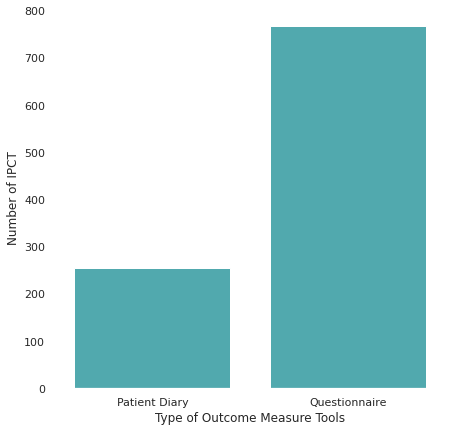

In [130]:
# visualize the number of observations per label in the training set
categories = ['Patient Diary','Questionnaire']
plt.figure(figsize = (7,7))

# Set the font size and colours
sns.set(font_scale = 1.5)
sns.set(rc = {'axes.facecolor':'white', 'figure.facecolor':'white'})

# Create the graph
ax = sns.barplot(categories, y_train_2.sum().values,color = '#42b7bd')
plt.ylabel('Number of IPCT', fontsize = 12)
plt.xlabel('Type of Outcome Measure Tools', fontsize = 12)

#add the text labels
rects = ax.patches
labels = y_train_2.sum().values

plt.show()


In [131]:
a = len(y_test_2.loc[y_test_2['Outcome Measures - questionnaire'] == 1])
b = len(y_test_2.loc[y_test_2['Outcome Measures - patient diary'] == 1])
# calculate the ratio of majority class and minority class
print('class proportion', a/b)


class proportion 3.0


In [156]:
# Evaluation matrix
def print_score_V2(y_pred, clf):
    print("Name of Model: ", clf.__class__.__name__)
    print (classification_report(y_test, y_pred,target_names=labels)) 
    print ('Summary classification_report')    
    print ('=====================================')
    print ('Accuracy:', accuracy_score(y_pred, y_test))
    print ('Hamming Loss:' , metrics.hamming_loss(y_pred, y_test))
    print ('=====================================')
    print("\n")
    
# Define the labels of the model
labels = ['Outcome Measures - patient diary','Outcome Measures - questionnaire'] 

In [198]:
# Confusion Matrix
def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize = 14):
    df_cm = pd.DataFrame(
        confusion_matrix, index = class_names, columns = class_names)
    try:
        heatmap = sns.heatmap(df_cm, annot = True, fmt = "d", cbar = False, ax = axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right',
                                 fontsize = fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 45, ha = 'right', 
                                 fontsize = fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title("Confusion Matrix for the class - " + class_label)


### 5.1 Random Forest (RF)

<b>Problem Transformation - Binary Relevance</b>

In [197]:
# Source of code
'''  @ARTICLE{2017arXiv170201460S,
      author = {{Szyma{\'n}ski}, P. and {Kajdanowicz}, T.},
      title = "{A scikit-based Python environment for performing multi-label classification}",
      journal = {ArXiv e-prints},
      archivePrefix = "arXiv",
      eprint = {1702.01460},
      primaryClass = "cs.LG",
      keywords = {Computer Science - Learning, Computer Science - Mathematical Software},
      year = 2017,
      month = feb,}
'''

# Set the hyperparameters
param_grid = [
    {'classifier__randomforestclassifier__bootstrap': [True,False], 
     'classifier__randomforestclassifier__n_estimators': [10, 20, 50,100],
     "classifier__randomforestclassifier__max_depth":[10,20, 30, 40],
     'classifier__randomforestclassifier__max_features': ['auto'],
     'classifier__randomforestclassifier__min_samples_split': [2, 5, 10],
     'classifier__randomforestclassifier__min_samples_leaf': [1, 2, 4],
    }
]

# Set the class weight to balanced_subsample
rf_classifier = BinaryRelevance(
    make_pipeline(RandomForestClassifier(random_state = 42,class_weight = 'balanced_subsample')) 
)

# Optimize Macro Recall Score
# Set CV to 10-fold
clf = GridSearchCV(rf_classifier, param_grid=param_grid, cv = 10, scoring = 'recall_macro')

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print_score_V2(y_pred,rf_classifier)

Name of Model:  BinaryRelevance
                                  precision    recall  f1-score   support

Outcome Measures - patient diary       0.19      0.30      0.23       110
Outcome Measures - questionnaire       0.48      0.68      0.56       330

                       micro avg       0.40      0.58      0.48       440
                       macro avg       0.34      0.49      0.40       440
                    weighted avg       0.41      0.58      0.48       440
                     samples avg       0.19      0.20      0.19       440

Summary classification_report
Accuracy: 0.5808435852372583
Hamming Loss: 0.2478031634446397




<b>Problem Transformation - Classifier Chain</b>

In [193]:
# Source code
'''  @inproceedings{read2009classifier,
      title={Classifier chains for multi-label classification},
      author={Read, Jesse and Pfahringer, Bernhard and Holmes, Geoff and Frank, Eibe},
      booktitle={Joint European Conference on Machine Learning and Knowledge Discovery in Databases},
      pages={254--269},
      year={2009},
      organization={Springer}}
'''

# Set the parameters
param_grid = [
    {'base_estimator__bootstrap': [True,False], 
     'base_estimator__n_estimators': [10, 20, 50,100],
     "base_estimator__max_depth":[10,20, 30, 40],
     'base_estimator__max_features': ['auto'],
     'base_estimator__min_samples_split': [2, 5, 10],
     'base_estimator__min_samples_leaf': [1, 2, 4],
     'base_estimator__random_state':[42],
     'base_estimator__class_weight':['balanced_subsample']}] # Set the class weight to balanced_subsample

rf_classifier = ClassifierChain(RandomForestClassifier())

# Optimize Macro Recall Score
# Set CV to 10-fold
clf = GridSearchCV(rf_classifier, param_grid = param_grid, cv = 10, scoring = 'recall_macro')

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print_score_V2(y_pred, rf_classifier)

Name of Model:  ClassifierChain
                                  precision    recall  f1-score   support

Outcome Measures - patient diary       0.20      0.41      0.27       110
Outcome Measures - questionnaire       0.48      0.67      0.56       330

                       micro avg       0.39      0.60      0.47       440
                       macro avg       0.34      0.54      0.41       440
                    weighted avg       0.41      0.60      0.48       440
                     samples avg       0.18      0.21      0.19       440

Summary classification_report
Accuracy: 0.5711775043936731
Hamming Loss: 0.2601054481546573




<b>Problem Transformation - Label Poweret</b>

In [194]:
# Source of Code
'''  @ARTICLE{2017arXiv170201460S,
      author = {{Szyma{\'n}ski}, P. and {Kajdanowicz}, T.},
      title = "{A scikit-based Python environment for performing multi-label classification}",
      journal = {ArXiv e-prints},
      archivePrefix = "arXiv",
      eprint = {1702.01460},
      primaryClass = "cs.LG",
      keywords = {Computer Science - Learning, Computer Science - Mathematical Software},
      year = 2017,
      month = feb,}
'''

# Set the hyperparameters
param_grid = [
    {'classifier__randomforestclassifier__bootstrap': [True,False], 
     'classifier__randomforestclassifier__n_estimators': [10, 20, 50,100],
     "classifier__randomforestclassifier__max_depth":[10,20, 30, 40],
     'classifier__randomforestclassifier__max_features': ['auto'],
     'classifier__randomforestclassifier__min_samples_split': [2, 5, 10],
     'classifier__randomforestclassifier__min_samples_leaf': [1, 2, 4],
    }
]
rf_classifier = LabelPowerset(
    make_pipeline(RandomForestClassifier(random_state = 42,class_weight = 'balanced_subsample'))) # Set the class weight to balanced_subsample

# Optimize Macro Recall Score
# Set CV to 10-fold
clf = GridSearchCV(rf_classifier, param_grid = param_grid, cv = 10, scoring = 'recall_macro')

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print_score_V2(y_pred, rf_classifier)


Name of Model:  LabelPowerset
                                  precision    recall  f1-score   support

Outcome Measures - patient diary       0.20      0.40      0.27       110
Outcome Measures - questionnaire       0.46      0.65      0.54       330

                       micro avg       0.38      0.58      0.46       440
                       macro avg       0.33      0.52      0.40       440
                    weighted avg       0.39      0.58      0.47       440
                     samples avg       0.19      0.20      0.19       440

Summary classification_report
Accuracy: 0.562390158172232
Hamming Loss: 0.2671353251318102




<b>Ensemble Method - RAkEL</b>

In [195]:
# Source code:
''' @ARTICLE{5567103,
    author={G. Tsoumakas and I. Katakis and I. Vlahavas},
    journal={IEEE Transactions on Knowledge and Data Engineering},
    title={Random k-Labelsets for Multilabel Classification},
    year={2011},
    volume={23},
    number={7},
    pages={1079-1089},
    doi={10.1109/TKDE.2010.164},
    ISSN={1041-4347},
    month={July},}
'''

# Set the parameters
param_grid = [
    {'base_classifier__bootstrap': [True,False], 
     'base_classifier__n_estimators': [10, 20, 50,100],
     "base_classifier__max_depth":[10,20, 30, 40],
     'base_classifier__max_features': ['auto'],
     'base_classifier__min_samples_split': [2, 5, 10],
     'base_classifier__min_samples_leaf': [1, 2, 4],
     'base_classifier__random_state':[42],
     'base_classifier__class_weight':['balanced_subsample']}]# Set the class weight to balanced_subsample

rf_classifier = RakelD(RandomForestClassifier())

# Optimize Macro Recall Score
# Set CV to 10-fold
clf = GridSearchCV(rf_classifier, param_grid=param_grid, cv = 10, scoring = 'recall_macro')

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print_score_V2(y_pred, rf_classifier)


Name of Model:  RakelD
                                  precision    recall  f1-score   support

Outcome Measures - patient diary       0.20      0.40      0.27       110
Outcome Measures - questionnaire       0.46      0.65      0.54       330

                       micro avg       0.38      0.58      0.46       440
                       macro avg       0.33      0.52      0.40       440
                    weighted avg       0.39      0.58      0.47       440
                     samples avg       0.19      0.20      0.19       440

Summary classification_report
Accuracy: 0.562390158172232
Hamming Loss: 0.2671353251318102




<b>Ensemble Method - Majority Voting Classifier</b>

In [165]:
# Source code
'''@Article{datadriven,
    author = {Szymański, Piotr and Kajdanowicz, Tomasz and Kersting, Kristian},
    title = {How Is a Data-Driven Approach Better than Random Choice in
    Label Space Division for Multi-Label Classification?},
    journal = {Entropy},
    volume = {18},
    year = {2016},
    number = {8},
    article_number = {282},
    url = {http://www.mdpi.com/1099-4300/18/8/282},
    issn = {1099-4300},
    doi = {10.3390/e18080282}}
'''

# Set the hyperparameters
parameters = {
    'classifier__base_estimator__bootstrap': [True,False], 
    'classifier__base_estimator__n_estimators': [10, 20, 50,100],
    "classifier__base_estimator__max_depth":[10,20, 30, 40],
    'classifier__base_estimator__max_features': ['auto'],
    'classifier__base_estimator__min_samples_split': [2, 5, 10],
    'classifier__base_estimator__min_samples_leaf': [1, 2, 4],
    'classifier__base_estimator__class_weight':['balanced_subsample'],# Set the class weight to balanced_subsample
    'classifier__base_estimator__random_state':[42],
    'clusterer': [
        NetworkXLabelGraphClusterer(LabelCooccurrenceGraphBuilder(weighted = True,
                                                                  include_self_edges = False), 'louvain'),
        NetworkXLabelGraphClusterer(LabelCooccurrenceGraphBuilder(weighted = True,
                                                                  include_self_edges = False), 'lpa')
    ]
}

# Optimize Macro Recall Score
# Set CV to 10-fold
best_model = GridSearchCV(MajorityVotingClassifier(ClassifierChain(RandomForestClassifier())),
                           parameters, scoring = 'recall_macro') 

# Fit the model
best_model.fit(X_train, y_train)

# Make predictions
y_pred_best_model = best_model.predict(X_test)
print_score_V2(y_pred_best_model, MajorityVotingClassifier())

Name of Model:  MajorityVotingClassifier
                                  precision    recall  f1-score   support

Outcome Measures - patient diary       0.21      0.33      0.26       110
Outcome Measures - questionnaire       0.48      0.64      0.55       330

                       micro avg       0.40      0.56      0.47       440
                       macro avg       0.35      0.48      0.40       440
                    weighted avg       0.41      0.56      0.48       440
                     samples avg       0.17      0.19      0.18       440

Summary classification_report
Accuracy: 0.5913884007029877
Hamming Loss: 0.24472759226713534




### 5.2 Logistic Regression (LR)


<b>Problem Transformation - Binary Relevance</b>

In [172]:
# Source code
''' @ARTICLE{2017arXiv170201460S,
      author = {{Szyma{\'n}ski}, P. and {Kajdanowicz}, T.},
      title = "{A scikit-based Python environment for performing multi-label classification}",
      journal = {ArXiv e-prints},
      archivePrefix = "arXiv",
      eprint = {1702.01460},
      primaryClass = "cs.LG",
      keywords = {Computer Science - Learning, Computer Science - Mathematical Software},
      year = 2017,
      month = feb,}
'''

# Set the hyperparameters
parameters = {
    "classifier__C":np.logspace(-3,3,7), 
    "classifier__penalty":["11","l2"], 
    "classifier__solver":['liblinear','newton-cg'],
    'classifier__class_weight':['balanced']} # Set the class weight to balanced

lr_classifier = BinaryRelevance(LogisticRegression(random_state = 42))

# Optimize Macro Recall Score
# Set CV to 10-fold
clf = GridSearchCV(lr_classifier, param_grid = parameters, cv = 10, scoring = 'recall_macro')

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print_score_V2(y_pred, lr_classifier)


Name of Model:  BinaryRelevance
                                  precision    recall  f1-score   support

Outcome Measures - patient diary       0.12      0.64      0.20       110
Outcome Measures - questionnaire       0.37      0.71      0.49       330

                       micro avg       0.25      0.69      0.37       440
                       macro avg       0.25      0.67      0.35       440
                    weighted avg       0.31      0.69      0.42       440
                     samples avg       0.17      0.24      0.19       440

Summary classification_report
Accuracy: 0.3523725834797891
Hamming Loss: 0.45474516695957823




<b>Problem Transformation - Classifier Chain</b> 

In [173]:
# Source Code
'''  @inproceedings{read2009classifier,
      title={Classifier chains for multi-label classification},
      author={Read, Jesse and Pfahringer, Bernhard and Holmes, Geoff and Frank, Eibe},
      booktitle={Joint European Conference on Machine Learning and Knowledge Discovery in Databases},
      pages={254--269},
      year={2009},
      organization={Springer}}
'''

# Set the hyperparameters
parameters = {
    "base_estimator__C":np.logspace(-3,3,7), 
    "base_estimator__penalty":["11","l2"], 
    "base_estimator__solver":['liblinear','newton-cg'],
    'base_estimator__class_weight':['balanced']}# Set the class weight to balanced

lr_classifier = ClassifierChain(LogisticRegression(random_state = 42))

# Optimize Macro Recall Score
# Set CV to 10-fold
clf = GridSearchCV(lr_classifier, param_grid=parameters, cv = 10, scoring = 'recall_macro')
 
# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print_score_V2(y_pred, lr_classifier)


Name of Model:  ClassifierChain
                                  precision    recall  f1-score   support

Outcome Measures - patient diary       0.12      0.59      0.20       110
Outcome Measures - questionnaire       0.38      0.75      0.51       330

                       micro avg       0.26      0.71      0.39       440
                       macro avg       0.25      0.67      0.35       440
                    weighted avg       0.32      0.71      0.43       440
                     samples avg       0.17      0.24      0.20       440

Summary classification_report
Accuracy: 0.3655536028119508
Hamming Loss: 0.437609841827768




<b>Problem Transformation - Label Powerset</b> 

In [174]:
# Source code
'''  @ARTICLE{2017arXiv170201460S,
      author = {{Szyma{\'n}ski}, P. and {Kajdanowicz}, T.},
      title = "{A scikit-based Python environment for performing multi-label classification}",
      journal = {ArXiv e-prints},
      archivePrefix = "arXiv",
      eprint = {1702.01460},
      primaryClass = "cs.LG",
      keywords = {Computer Science - Learning, Computer Science - Mathematical Software},
      year = 2017,
      month = feb,}
'''

# Set the hyperparameters
parameters = {
    "classifier__C":np.logspace(-3,3,7), 
    "classifier__penalty":["11","l2"], 
    "classifier__solver":['liblinear','newton-cg'],
    'classifier__class_weight':['balanced']} # Set the class weight to balanced

lr_classifier = LabelPowerset(LogisticRegression(random_state = 42))

# Optimize Macro Recall Score
# Set CV to 10-fold
clf = GridSearchCV(lr_classifier, param_grid = parameters, cv = 10, scoring = 'recall_macro')

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print_score_V2(y_pred, lr_classifier)


Name of Model:  LabelPowerset
                                  precision    recall  f1-score   support

Outcome Measures - patient diary       0.12      0.57      0.20       110
Outcome Measures - questionnaire       0.40      0.64      0.49       330

                       micro avg       0.26      0.62      0.37       440
                       macro avg       0.26      0.61      0.35       440
                    weighted avg       0.33      0.62      0.42       440
                     samples avg       0.17      0.21      0.19       440

Summary classification_report
Accuracy: 0.35588752196836554
Hamming Loss: 0.4121265377855888




<b>Ensemble Method - RAkEL</b> 

In [175]:
# Source code:
''' @ARTICLE{5567103,
    author={G. Tsoumakas and I. Katakis and I. Vlahavas},
    journal={IEEE Transactions on Knowledge and Data Engineering},
    title={Random k-Labelsets for Multilabel Classification},
    year={2011},
    volume={23},
    number={7},
    pages={1079-1089},
    doi={10.1109/TKDE.2010.164},
    ISSN={1041-4347},
    month={July}}
'''

# Set the hyperparameters
parameters = {
    "base_classifier__C":np.logspace(-3,3,7), 
    "base_classifier__penalty":["11","l2"], 
    "base_classifier__solver":['liblinear','newton-cg'],
    'base_classifier__class_weight':['balanced']}# Set the class weight to balanced

lr_classifier = RakelD(LogisticRegression(random_state = 42))

# Optimize Macro Recall Score
# Set CV to 10-fold
clf = GridSearchCV(lr_classifier, param_grid = parameters, cv = 10, scoring = 'recall_macro')

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print_score_V2(y_pred, lr_classifier)


Name of Model:  RakelD
                                  precision    recall  f1-score   support

Outcome Measures - patient diary       0.12      0.57      0.20       110
Outcome Measures - questionnaire       0.40      0.64      0.49       330

                       micro avg       0.26      0.62      0.37       440
                       macro avg       0.26      0.61      0.35       440
                    weighted avg       0.33      0.62      0.42       440
                     samples avg       0.17      0.21      0.19       440

Summary classification_report
Accuracy: 0.35588752196836554
Hamming Loss: 0.4121265377855888




<b>Ensemble Method - Major Voting Classifier</b> 

In [176]:
# Source Code
'''@Article{datadriven,
    author = {Szymański, Piotr and Kajdanowicz, Tomasz and Kersting, Kristian},
    title = {How Is a Data-Driven Approach Better than Random Choice in
    Label Space Division for Multi-Label Classification?},
    journal = {Entropy},
    volume = {18},
    year = {2016},
    number = {8},
    article_number = {282},
    url = {http://www.mdpi.com/1099-4300/18/8/282},
    issn = {1099-4300},
    doi = {10.3390/e18080282}}
'''

# Set the hyperparameters
parameters = {
    "classifier__base_estimator__C":np.logspace(-3,3,7), 
    "classifier__base_estimator__penalty":["11","l2"], 
    "classifier__base_estimator__solver":['liblinear','newton-cg'],
    'classifier__base_estimator__class_weight':['balanced'], #Set the class weight to balanced
    'clusterer': [
        NetworkXLabelGraphClusterer(LabelCooccurrenceGraphBuilder(weighted = True, 
                                                                  include_self_edges = False), 'louvain'),
        NetworkXLabelGraphClusterer(LabelCooccurrenceGraphBuilder(weighted = True, 
                                                                  include_self_edges = False), 'lpa')]}

lr_classifier = MajorityVotingClassifier(ClassifierChain(LogisticRegression(random_state = 42)))

# Optimize Macro Recall Score
# Set CV to 10-fold
clf = GridSearchCV(lr_classifier, param_grid = parameters, cv = 10, scoring = 'recall_macro')

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print_score_V2(y_pred, lr_classifier)


Name of Model:  MajorityVotingClassifier
                                  precision    recall  f1-score   support

Outcome Measures - patient diary       0.12      0.59      0.20       110
Outcome Measures - questionnaire       0.38      0.75      0.51       330

                       micro avg       0.26      0.71      0.39       440
                       macro avg       0.25      0.67      0.35       440
                    weighted avg       0.32      0.71      0.43       440
                     samples avg       0.17      0.24      0.20       440

Summary classification_report
Accuracy: 0.3655536028119508
Hamming Loss: 0.437609841827768




### 5.3 Support Vector Machine (SVM)

<b>Problem Transformation Method - Binary Relevance</b> 

In [177]:
# Source code
'''  @ARTICLE{2017arXiv170201460S,
      author = {{Szyma{\'n}ski}, P. and {Kajdanowicz}, T.},
      title = "{A scikit-based Python environment for performing multi-label classification}",
      journal = {ArXiv e-prints},
      archivePrefix = "arXiv",
      eprint = {1702.01460},
      primaryClass = "cs.LG",
      keywords = {Computer Science - Learning, Computer Science - Mathematical Software},
      year = 2017,
      month = feb,}
'''

# Set the hyperparameters
param_grid = {'classifier__C': [0.1,1, 10],
              'classifier__gamma':  [1,0.1,0.01],
              'classifier__kernel': ['rbf', 'sigmoid'],
              'classifier__class_weight':['balanced']}# Set the class weight to balanced

svc_classifier = BinaryRelevance(SVC(random_state = 42))

# Optimize Macro Recall Score
# Set CV to 10-fold
clf = GridSearchCV(svc_classifier, param_grid=param_grid, cv = 10, scoring = 'recall_macro')

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print_score_V2(y_pred, svc_classifier)


Name of Model:  BinaryRelevance
                                  precision    recall  f1-score   support

Outcome Measures - patient diary       0.14      0.69      0.24       110
Outcome Measures - questionnaire       0.42      0.76      0.54       330

                       micro avg       0.29      0.75      0.42       440
                       macro avg       0.28      0.73      0.39       440
                    weighted avg       0.35      0.75      0.47       440
                     samples avg       0.19      0.26      0.21       440

Summary classification_report
Accuracy: 0.3989455184534271
Hamming Loss: 0.398506151142355




<b>Problem Transformation Method - Classifier Chain</b> 

In [178]:
# Source Code
'''  @inproceedings{read2009classifier,
      title={Classifier chains for multi-label classification},
      author={Read, Jesse and Pfahringer, Bernhard and Holmes, Geoff and Frank, Eibe},
      booktitle={Joint European Conference on Machine Learning and Knowledge Discovery in Databases},
      pages={254--269},
      year={2009},
      organization={Springer}}
'''

# Set the hyperparameters
param_grid = {'base_estimator__C': [0.1,1, 10],
              'base_estimator__gamma':  [1,0.1,0.01],
              'base_estimator__kernel': ['rbf', 'sigmoid'],
              'base_estimator__class_weight':['balanced']}

svc_classifier = ClassifierChain(SVC(random_state = 42))

# Optimize Macro Recall Score
# Set CV to 10-fold
clf = GridSearchCV(svc_classifier, param_grid = param_grid, cv = 10, scoring = 'recall_macro')

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print_score_V2(y_pred, svc_classifier)


Name of Model:  ClassifierChain
                                  precision    recall  f1-score   support

Outcome Measures - patient diary       0.14      0.69      0.24       110
Outcome Measures - questionnaire       0.41      0.77      0.54       330

                       micro avg       0.29      0.75      0.42       440
                       macro avg       0.28      0.73      0.39       440
                    weighted avg       0.34      0.75      0.46       440
                     samples avg       0.19      0.26      0.21       440

Summary classification_report
Accuracy: 0.4024604569420035
Hamming Loss: 0.4068541300527241




<b>Problem Transformation Method - Label Powerset</b> 

In [179]:
# Source code
'''  @ARTICLE{2017arXiv170201460S,
      author = {{Szyma{\'n}ski}, P. and {Kajdanowicz}, T.},
      title = "{A scikit-based Python environment for performing multi-label classification}",
      journal = {ArXiv e-prints},
      archivePrefix = "arXiv",
      eprint = {1702.01460},
      primaryClass = "cs.LG",
      keywords = {Computer Science - Learning, Computer Science - Mathematical Software},
      year = 2017,
      month = feb,}
'''

# Set the hyperparameters
param_grid = {'classifier__C': [0.1,1, 10],
              'classifier__gamma':  [1,0.1,0.01],
              'classifier__kernel': ['rbf', 'sigmoid'],
              'classifier__class_weight':['balanced']} # Set the class weight to balanced

svc_classifier = LabelPowerset(SVC(random_state = 42))

# Optimize Macro Recall Score
# Set CV to 10-fold
clf = GridSearchCV(svc_classifier, param_grid=param_grid, cv = 10, scoring = 'recall_macro')

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print_score_V2(y_pred, svc_classifier)


Name of Model:  LabelPowerset
                                  precision    recall  f1-score   support

Outcome Measures - patient diary       0.09      0.82      0.17       110
Outcome Measures - questionnaire       0.36      0.54      0.43       330

                       micro avg       0.18      0.61      0.28       440
                       macro avg       0.23      0.68      0.30       440
                    weighted avg       0.29      0.61      0.37       440
                     samples avg       0.15      0.21      0.16       440

Summary classification_report
Accuracy: 0.11687170474516696
Hamming Loss: 0.5953427065026362




<b>Ensemble Method - RAkEL</b> 

In [180]:
# Source code:
''' @ARTICLE{5567103,
    author={G. Tsoumakas and I. Katakis and I. Vlahavas},
    journal={IEEE Transactions on Knowledge and Data Engineering},
    title={Random k-Labelsets for Multilabel Classification},
    year={2011},
    volume={23},
    number={7},
    pages={1079-1089},
    doi={10.1109/TKDE.2010.164},
    ISSN={1041-4347},
    month={July},}
'''

# Set the hyperparameters
param_grid = {'base_classifier__C': [0.1,1, 10],
              'base_classifier__gamma':  [1,0.1,0.01],
              'base_classifier__kernel': ['rbf', 'sigmoid'],
              'base_classifier__class_weight':['balanced']} # Set the class weight to balanced

svc_classifier = RakelD(SVC(random_state = 42))

# Optimize Macro Recall Score
# Set CV to 10-fold
clf = GridSearchCV(svc_classifier, param_grid=param_grid, cv = 10, scoring = 'recall_macro')

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print_score_V2(y_pred, svc_classifier)


Name of Model:  RakelD
                                  precision    recall  f1-score   support

Outcome Measures - patient diary       0.09      0.82      0.17       110
Outcome Measures - questionnaire       0.36      0.54      0.43       330

                       micro avg       0.18      0.61      0.28       440
                       macro avg       0.23      0.68      0.30       440
                    weighted avg       0.29      0.61      0.37       440
                     samples avg       0.15      0.21      0.16       440

Summary classification_report
Accuracy: 0.11687170474516696
Hamming Loss: 0.5953427065026362




<b>Ensemble Method - Majority Voting Classifier</b> 

In [187]:
# Source Code
'''@Article{datadriven,
    author = {Szymański, Piotr and Kajdanowicz, Tomasz and Kersting, Kristian},
    title = {How Is a Data-Driven Approach Better than Random Choice in
    Label Space Division for Multi-Label Classification?},
    journal = {Entropy},
    volume = {18},
    year = {2016},
    number = {8},
    article_number = {282},
    url = {http://www.mdpi.com/1099-4300/18/8/282},
    issn = {1099-4300},
    doi = {10.3390/e18080282}
}'''

# Set the hyperparameters
parameters = {'classifier__base_estimator__C': [0.1,1, 10],
              'classifier__base_estimator__gamma':  [1,0.1,0.01],
              'classifier__base_estimator__kernel': ['rbf',  'sigmoid'],
              'classifier__base_estimator__class_weight':['balanced'],# Set the class weight to balanced
              'clusterer': [
        NetworkXLabelGraphClusterer(LabelCooccurrenceGraphBuilder(weighted=True, include_self_edges=False), 'louvain'),
        NetworkXLabelGraphClusterer(LabelCooccurrenceGraphBuilder(weighted=True, include_self_edges=False), 'lpa')
    ]}

svc_classifier = MajorityVotingClassifier(ClassifierChain(SVC(random_state=42)))

# Optimize Macro Recall Score
# Set CV to 10-fold
clf = GridSearchCV(svc_classifier, param_grid=parameters, cv=10, scoring = 'recall_macro')

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print_score_V2(y_pred, svc_classifier)

Name of Model:  MajorityVotingClassifier
                                  precision    recall  f1-score   support

Outcome Measures - patient diary       0.14      0.69      0.24       110
Outcome Measures - questionnaire       0.41      0.77      0.54       330

                       micro avg       0.29      0.75      0.42       440
                       macro avg       0.28      0.73      0.39       440
                    weighted avg       0.34      0.75      0.46       440
                     samples avg       0.19      0.26      0.21       440

Summary classification_report
Accuracy: 0.4024604569420035
Hamming Loss: 0.4068541300527241




### 5.4 Decision Tree (DT)

<b>Problem Transformation Method - Binary Relevance</b> 

In [188]:
# Source code
'''  @ARTICLE{2017arXiv170201460S,
      author = {{Szyma{\'n}ski}, P. and {Kajdanowicz}, T.},
      title = "{A scikit-based Python environment for performing multi-label classification}",
      journal = {ArXiv e-prints},
      archivePrefix = "arXiv",
      eprint = {1702.01460},
      primaryClass = "cs.LG",
      keywords = {Computer Science - Learning, Computer Science - Mathematical Software},
      year = 2017,
      month = feb,}
'''

# Set the hyperparameters
param_grid = {'classifier__max_features': ['auto', 'sqrt'],
              'classifier__ccp_alpha': [0.1, .01, 1],
              'classifier__max_depth' : [5, 7, 10],
              'classifier__criterion' :['gini', 'entropy'],
              'classifier__min_samples_split':[1,3,5,8],
              'classifier__class_weight':['balanced']# Set the class weight to balanced
             }

tree_classifier = BinaryRelevance(DecisionTreeClassifier(random_state = 42))

# Optimize Macro Recall Score
# Set CV to 10-fold
clf = GridSearchCV(tree_classifier, param_grid = param_grid, cv = 10, scoring = 'recall_macro')

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print_score_V2(y_pred, tree_classifier)

Name of Model:  BinaryRelevance
                                  precision    recall  f1-score   support

Outcome Measures - patient diary       0.10      0.62      0.18       110
Outcome Measures - questionnaire       0.35      0.83      0.49       330

                       micro avg       0.24      0.78      0.36       440
                       macro avg       0.23      0.73      0.33       440
                    weighted avg       0.29      0.78      0.41       440
                     samples avg       0.20      0.27      0.22       440

Summary classification_report
Accuracy: 0.23022847100175747
Hamming Loss: 0.5298769771528998




<b>Problem Transformation Method - Classifier Chain</b> 

In [189]:
# Source Code
'''  @inproceedings{read2009classifier,
      title={Classifier chains for multi-label classification},
      author={Read, Jesse and Pfahringer, Bernhard and Holmes, Geoff and Frank, Eibe},
      booktitle={Joint European Conference on Machine Learning and Knowledge Discovery in Databases},
      pages={254--269},
      year={2009},
      organization={Springer}}
'''

# Set the parameters
param_grid = {'base_estimator__max_features': ['auto', 'sqrt'],
              'base_estimator__ccp_alpha': [0.1, .01,1],
              'base_estimator__max_depth' : [5, 7, 10],
              'base_estimator__criterion' :['gini', 'entropy'],
              'base_estimator__min_samples_split':[1,3,5,8],
              'base_estimator__class_weight':['balanced']# Set the class weight to balanced
             }

tree_classifier = ClassifierChain(DecisionTreeClassifier(random_state = 42))

# Optimize Macro Recall Score
# Set CV to 10-fold
clf = GridSearchCV(tree_classifier, param_grid = param_grid, cv = 10, scoring = 'recall_macro')

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print_score_V2(y_pred, tree_classifier)

Name of Model:  ClassifierChain
                                  precision    recall  f1-score   support

Outcome Measures - patient diary       0.10      0.62      0.18       110
Outcome Measures - questionnaire       0.35      0.82      0.49       330

                       micro avg       0.23      0.77      0.36       440
                       macro avg       0.22      0.72      0.33       440
                    weighted avg       0.29      0.77      0.41       440
                     samples avg       0.20      0.27      0.22       440

Summary classification_report
Accuracy: 0.22847100175746923
Hamming Loss: 0.531195079086116




<b>Problem Transformation Method - Label Powerset</b> 

In [190]:
# Source code
'''  @ARTICLE{2017arXiv170201460S,
      author = {{Szyma{\'n}ski}, P. and {Kajdanowicz}, T.},
      title = "{A scikit-based Python environment for performing multi-label classification}",
      journal = {ArXiv e-prints},
      archivePrefix = "arXiv",
      eprint = {1702.01460},
      primaryClass = "cs.LG",
      keywords = {Computer Science - Learning, Computer Science - Mathematical Software},
      year = 2017,
      month = feb}
'''

# Set the hyperparameters
param_grid = {'classifier__max_features': ['auto', 'sqrt'],
              'classifier__ccp_alpha': [0.1, .01, 1],
              'classifier__max_depth' : [5, 7, 10],
              'classifier__criterion' :['gini', 'entropy'],
              'classifier__min_samples_split':[1,3,5,8],
              'classifier__class_weight':['balanced']# Set the class weight to balanced
             }

tree_classifier = LabelPowerset(DecisionTreeClassifier(random_state = 42))

# Optimize Macro Recall Score
# Set CV to 10-fold
clf = GridSearchCV(tree_classifier, param_grid = param_grid, cv = 10, scoring = 'recall_macro')

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print_score_V2(y_pred, tree_classifier)

Name of Model:  LabelPowerset
                                  precision    recall  f1-score   support

Outcome Measures - patient diary       0.08      0.21      0.12       110
Outcome Measures - questionnaire       0.35      0.83      0.49       330

                       micro avg       0.28      0.68      0.40       440
                       macro avg       0.22      0.52      0.31       440
                    weighted avg       0.28      0.68      0.40       440
                     samples avg       0.23      0.24      0.23       440

Summary classification_report
Accuracy: 0.3286467486818981
Hamming Loss: 0.3976274165202109




<b>Ensemble Method - RAkEL</b> 

In [191]:
# Source code:
''' @ARTICLE{5567103,
    author={G. Tsoumakas and I. Katakis and I. Vlahavas},
    journal={IEEE Transactions on Knowledge and Data Engineering},
    title={Random k-Labelsets for Multilabel Classification},
    year={2011},
    volume={23},
    number={7},
    pages={1079-1089},
    doi={10.1109/TKDE.2010.164},
    ISSN={1041-4347},
    month={July}}
'''

# Set the hyperparameters
param_grid = {'base_classifier__max_features': ['auto', 'sqrt'],
              'base_classifier__ccp_alpha': [0.1, .01,1],
              'base_classifier__max_depth' : [5, 7, 10],
              'base_classifier__criterion' :['gini', 'entropy'],
              'base_classifier__min_samples_split':[1,3,5,8],
              'base_classifier__class_weight':['balanced']# Set the class weight to balanced
             }

tree_classifier = RakelD(DecisionTreeClassifier(random_state = 42))

# Optimize Macro Recall Score
# Set CV to 10-fold
clf = GridSearchCV(tree_classifier, param_grid = param_grid, cv = 10, scoring = 'recall_macro')

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print_score_V2(y_pred, tree_classifier)

Name of Model:  RakelD
                                  precision    recall  f1-score   support

Outcome Measures - patient diary       0.08      0.21      0.12       110
Outcome Measures - questionnaire       0.35      0.83      0.49       330

                       micro avg       0.28      0.68      0.40       440
                       macro avg       0.22      0.52      0.31       440
                    weighted avg       0.28      0.68      0.40       440
                     samples avg       0.23      0.24      0.23       440

Summary classification_report
Accuracy: 0.3286467486818981
Hamming Loss: 0.3976274165202109




<b>Ensemble Method - Majority Voting Classifier</b> 

In [192]:
# Source Code
''' @Article{datadriven,
    author = {Szymański, Piotr and Kajdanowicz, Tomasz and Kersting, Kristian},
    title = {How Is a Data-Driven Approach Better than Random Choice in
    Label Space Division for Multi-Label Classification?},
    journal = {Entropy},
    volume = {18},
    year = {2016},
    number = {8},
    article_number = {282},
    url = {http://www.mdpi.com/1099-4300/18/8/282},
    issn = {1099-4300},
    doi = {10.3390/e18080282}}
'''

# Set the hyperparameters
param_grid = {'classifier__base_estimator__max_features': ['auto', 'sqrt'],
              'classifier__base_estimator__ccp_alpha': [0.1, .01,1],
              'classifier__base_estimator__max_depth' : [5, 7, 10],
              'classifier__base_estimator__criterion' :['gini', 'entropy'],
              'classifier__base_estimator__min_samples_split':[1,3,5,8],
              'classifier__base_estimator__class_weight':['balanced'],# Set the class weight to balanced
              'clusterer': [
        NetworkXLabelGraphClusterer(LabelCooccurrenceGraphBuilder(weighted = True, 
                                                                  include_self_edges = False), 'louvain'),
        NetworkXLabelGraphClusterer(LabelCooccurrenceGraphBuilder(weighted = True, 
                                                                  include_self_edges = False), 'lpa')]}
             
tree_classifier = MajorityVotingClassifier(ClassifierChain(DecisionTreeClassifier(random_state = 42)))

# Optimize Macro Recall Score
# Set CV to 10-fold
clf = GridSearchCV(tree_classifier, param_grid=param_grid, cv = 10, scoring = 'recall_macro')

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print_score_V2(y_pred, tree_classifier)

Name of Model:  MajorityVotingClassifier
                                  precision    recall  f1-score   support

Outcome Measures - patient diary       0.10      0.62      0.18       110
Outcome Measures - questionnaire       0.35      0.82      0.49       330

                       micro avg       0.23      0.77      0.36       440
                       macro avg       0.22      0.72      0.33       440
                    weighted avg       0.29      0.77      0.41       440
                     samples avg       0.20      0.27      0.22       440

Summary classification_report
Accuracy: 0.22847100175746923
Hamming Loss: 0.531195079086116




### 5.5 Extreme Gradient Boosting (XGB)

<b>Problem Transformation Method - Binary Relevance</b> 

In [157]:
# Source code
'''  @ARTICLE{2017arXiv170201460S,
      author = {{Szyma{\'n}ski}, P. and {Kajdanowicz}, T.},
      title = "{A scikit-based Python environment for performing multi-label classification}",
      journal = {ArXiv e-prints},
      archivePrefix = "arXiv",
      eprint = {1702.01460},
      primaryClass = "cs.LG",
      keywords = {Computer Science - Learning, Computer Science - Mathematical Software},
      year = 2017,
      month = feb}
'''

# Set the hyperparameters
param_grid = {'classifier__min_child_weight': [1, 5],
              'classifier__gamma': [0.5, 1, 2],
              'classifier__subsample': [0.6, 0.8, 1.0],
              'classifier__colsample_bytree': [0.6, 0.8, 1.0],
              'classifier__max_depth': [3, 4, 5],
              'classifier__scale_pos_weight':[3] # Set the class weight to equal the ratio of majority to minority class
             }

xgb_classifier = BinaryRelevance(XGBClassifier(random_state = 42))

# Optimize Macro Recall Score
# Set CV to 10-fold
clf = GridSearchCV(xgb_classifier, param_grid = param_grid, cv = 10, scoring = 'recall_macro')

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print_score_V2(y_pred, xgb_classifier)

Name of Model:  BinaryRelevance
                                  precision    recall  f1-score   support

Outcome Measures - patient diary       0.23      0.17      0.20       110
Outcome Measures - questionnaire       0.46      0.71      0.56       330

                       micro avg       0.43      0.57      0.49       440
                       macro avg       0.35      0.44      0.38       440
                    weighted avg       0.40      0.57      0.47       440
                     samples avg       0.20      0.20      0.20       440

Summary classification_report
Accuracy: 0.5940246045694201
Hamming Loss: 0.22978910369068542




<b>Problem Transformation Method - Classifier Chain</b> 

In [159]:
# Source Code
'''@inproceedings{read2009classifier,
  title={Classifier chains for multi-label classification},
  author={Read, Jesse and Pfahringer, Bernhard and Holmes, Geoff and Frank, Eibe},
  booktitle={Joint European Conference on Machine Learning and Knowledge Discovery in Databases},
  pages={254--269},
  year={2009},
  organization={Springer}}
'''

# Set the hyperparameters
param_grid = {'base_estimator__min_child_weight': [1, 5],
              'base_estimator__gamma': [0.5, 1, 2],
              'base_estimator__subsample': [0.6, 0.8, 1.0],
              'base_estimator__colsample_bytree': [0.6, 0.8, 1.0],
              'base_estimator__max_depth': [3, 4, 5],
              'base_estimator__scale_pos_weight':[3]# Set the class weight to equal the ratio of majority to minority class
             }

xgb_classifier = ClassifierChain(XGBClassifier(random_state=42))

# Optimize Macro Recall Score
# Set CV to 10-fold
clf = GridSearchCV(xgb_classifier, param_grid=param_grid, cv=10, scoring = 'recall_macro')

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print_score_V2(y_pred, xgb_classifier)

Name of Model:  ClassifierChain
                                  precision    recall  f1-score   support

Outcome Measures - patient diary       0.22      0.16      0.19       110
Outcome Measures - questionnaire       0.46      0.68      0.54       330

                       micro avg       0.42      0.55      0.48       440
                       macro avg       0.34      0.42      0.37       440
                    weighted avg       0.40      0.55      0.45       440
                     samples avg       0.19      0.19      0.19       440

Summary classification_report
Accuracy: 0.5896309314586995
Hamming Loss: 0.23286467486818982




<b>Problem Transformation Method - Label Powerset</b> 

In [160]:
# Source code
'''  @ARTICLE{2017arXiv170201460S,
      author = {{Szyma{\'n}ski}, P. and {Kajdanowicz}, T.},
      title = "{A scikit-based Python environment for performing multi-label classification}",
      journal = {ArXiv e-prints},
      archivePrefix = "arXiv",
      eprint = {1702.01460},
      primaryClass = "cs.LG",
      keywords = {Computer Science - Learning, Computer Science - Mathematical Software},
      year = 2017,
      month = feb,}
'''

# Set the hyperparameters
param_grid = {'classifier__min_child_weight': [1, 5],
              'classifier__gamma': [0.5, 1, 2],
              'classifier__subsample': [0.6, 0.8, 1.0],
              'classifier__colsample_bytree': [0.6, 0.8, 1.0],
              'classifier__max_depth': [3, 4, 5],
              'classifier__scale_pos_weight':[3]}# Set the class weight to equal the ratio of majority to minority class

xgb_classifier = LabelPowerset(XGBClassifier(random_state = 42))

# Optimize Macro Recall Score
# Set CV to 10-fold
clf = GridSearchCV(xgb_classifier, param_grid=param_grid, cv = 10, scoring = 'recall_macro')

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print_score_V2(y_pred, xgb_classifier)

[20:44:13] WARNING: ../src/learner.cc:627: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:44:14] WARNING: ../src/learner.cc:627: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:44:15] WARNING: ../src/learner.cc:627: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actual

<b>Ensemble Method - RAkEL</b> 

In [161]:
# Source code:
''' @ARTICLE{5567103,
    author={G. Tsoumakas and I. Katakis and I. Vlahavas},
    journal={IEEE Transactions on Knowledge and Data Engineering},
    title={Random k-Labelsets for Multilabel Classification},
    year={2011},
    volume={23},
    number={7},
    pages={1079-1089},
    doi={10.1109/TKDE.2010.164},
    ISSN={1041-4347},
    month={July},}
'''

# Set the hyperparameters
param_grid = {'base_classifier__min_child_weight': [1, 5],
              'base_classifier__gamma': [0.5, 1, 2],
              'base_classifier__subsample': [0.6, 0.8, 1.0],
              'base_classifier__colsample_bytree': [0.6, 0.8, 1.0],
              'base_classifier__max_depth': [3, 4, 5],
              'base_classifier__scale_pos_weight':[3]}# Set the class weight to equal the ratio of majority to minority class

xgb_classifier = RakelD(XGBClassifier(random_state=42))

# Optimize Macro Recall Score
# Set CV to 10-fold
clf = GridSearchCV(xgb_classifier, param_grid=param_grid, cv=10, scoring = 'recall_macro')

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print_score_V2(y_pred, xgb_classifier)

[21:08:25] WARNING: ../src/learner.cc:627: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:08:26] WARNING: ../src/learner.cc:627: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:08:27] WARNING: ../src/learner.cc:627: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actual

<b>Ensemble Method - Majority Voting Classifier</b> 

In [162]:
# Major Voting Classifier - XGBoost

# Source Code
'''@Article{datadriven,
    author = {Szymański, Piotr and Kajdanowicz, Tomasz and Kersting, Kristian},
    title = {How Is a Data-Driven Approach Better than Random Choice in
    Label Space Division for Multi-Label Classification?},
    journal = {Entropy},
    volume = {18},
    year = {2016},
    number = {8},
    article_number = {282},
    url = {http://www.mdpi.com/1099-4300/18/8/282},
    issn = {1099-4300},
    doi = {10.3390/e18080282}}
'''

# Set the hyperparameters
param_grid = {'classifier__base_estimator__min_child_weight': [1, 5],
              'classifier__base_estimator__gamma': [0.5, 1, 2],
              'classifier__base_estimator__subsample': [0.6, 0.8, 1.0],
              'classifier__base_estimator__colsample_bytree': [0.6, 0.8, 1.0],
              'classifier__base_estimator__max_depth': [3, 4, 5],
              'classifier__base_estimator__scale_pos_weight':[3],# Set the class weight to equal the ratio of majority to minority class
              'clusterer': [
        NetworkXLabelGraphClusterer(LabelCooccurrenceGraphBuilder(weighted=True, include_self_edges=False), 'louvain'),
        NetworkXLabelGraphClusterer(LabelCooccurrenceGraphBuilder(weighted=True, include_self_edges=False), 'lpa')
    ]}
             
xgb_classifier = MajorityVotingClassifier(ClassifierChain(XGBClassifier(random_state=42)))

# Optimize Macro Recall Score
# Set CV to 10-fold
clf = GridSearchCV(xgb_classifier, param_grid=param_grid, cv=10, scoring = 'recall_macro')

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print_score_V2(y_pred, xgb_classifier)

Name of Model:  MajorityVotingClassifier
                                  precision    recall  f1-score   support

Outcome Measures - patient diary       0.22      0.16      0.19       110
Outcome Measures - questionnaire       0.46      0.68      0.54       330

                       micro avg       0.42      0.55      0.48       440
                       macro avg       0.34      0.42      0.37       440
                    weighted avg       0.40      0.55      0.45       440
                     samples avg       0.19      0.19      0.19       440

Summary classification_report
Accuracy: 0.5896309314586995
Hamming Loss: 0.23286467486818982




### 5.6 MLkNN (Algorithm Adaptation Method)

Note: MLkNN and BRkNN requires scikit-learn==0.24.1

In [ ]:
# Source code
'''
@article{zhang2007ml,
  title={ML-KNN: A lazy learning approach to multi-label learning},
  author={Zhang, Min-Ling and Zhou, Zhi-Hua},
  journal={Pattern recognition},
  volume={40},
  number={7},
  pages={2038--2048},
  year={2007},
  publisher={Elsevier}}
'''

# Set the hyperparameters
parameters = {'k': range(1,3), 's': [0.5, 0.7, 1.0]}

# Optimize Macro Recall Score
# Set CV to 10-fold
clf = GridSearchCV(MLkNN(), parameters, scoring='recall_macro')

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)
print_score_V2(predictions, clf)
print (clf.best_params_, clf.best_score_)

### 5.7 BRkNN (Algorithm Adaptation Method)

In [ ]:
# Source code
'''
@inproceedings{EleftheriosSpyromitros2008,
   author = {Eleftherios Spyromitros, Grigorios Tsoumakas, Ioannis Vlahavas},
   booktitle = {Proc. 5th Hellenic Conference on Artificial Intelligence (SETN 2008)},
   title = {An Empirical Study of Lazy Multilabel Classification Algorithms},
   year = {2008},
   location = {Syros, Greece}}
'''

# Set the hyperparameters
parameters = {'k': range(1,3)}

# Optimize Macro Recall Score
# Set CV to 10-fold
clf = GridSearchCV(BRkNNaClassifier(), parameters, scoring='recall_macro')

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)
print_score_V2(predictions, clf)

## Based on the average ranks of algorithms, the best algorithm is MVC-RF.

### 5.8 Computing the Feature Permutation Importance of MVC-RF

In [166]:
# Restate the names of features
features_= X_test_2[['Disease Type_new','Placebo (Y/N)','Year Started','Primary Purpose_new',
                    'Phase_Imputed','Masking_new','Intervention Model_new','Number of Clinical Trial Sites',
                    'Age (min) years_Imputed','Study Duration (in days)','No of Participants','INTERVENTION Behavioral (Y/N)',
                    'INTERVENTION Procedure - blood collection','INTERVENTION Procedure - electrocardiogram',
                    'INTERVENTION Procedure - urinalysis','Drug/Biological Delivery - oral',
                    'Drug/Biological Delivery - injection','Drug/Biological Delivery - nasal',
                    'INTERVENTION Device (Y/N)','Developing countries (Y/N)','INTERVENTION Biological (Y/N)',
                    'Age (max) years_Imputed','Number of countries']]

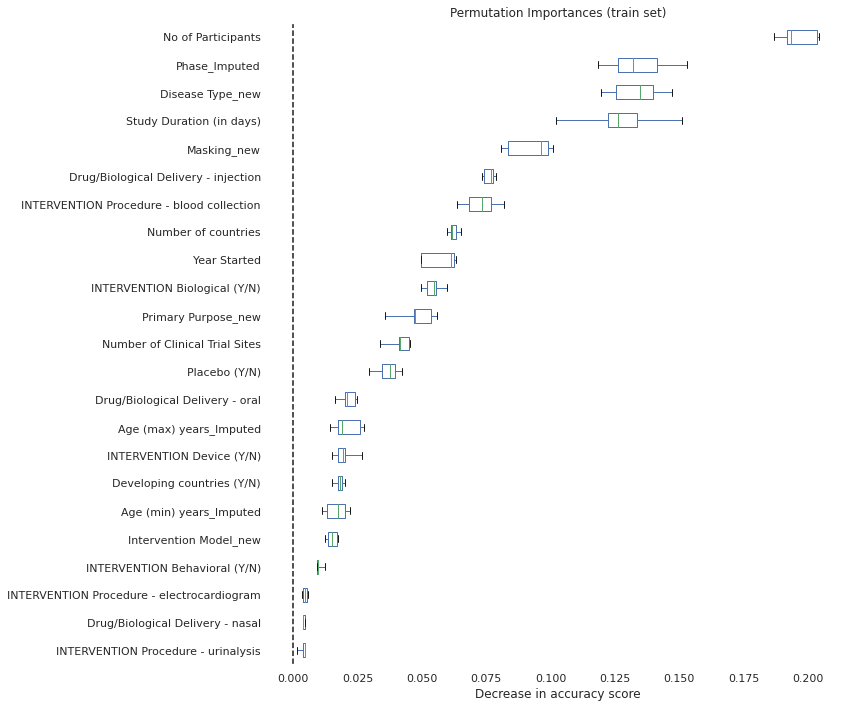

In [167]:
# Compute Feature Permutation Importance in train set

result = permutation_importance(best_model, X_train, y_train,
                          random_state=42)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=features_.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

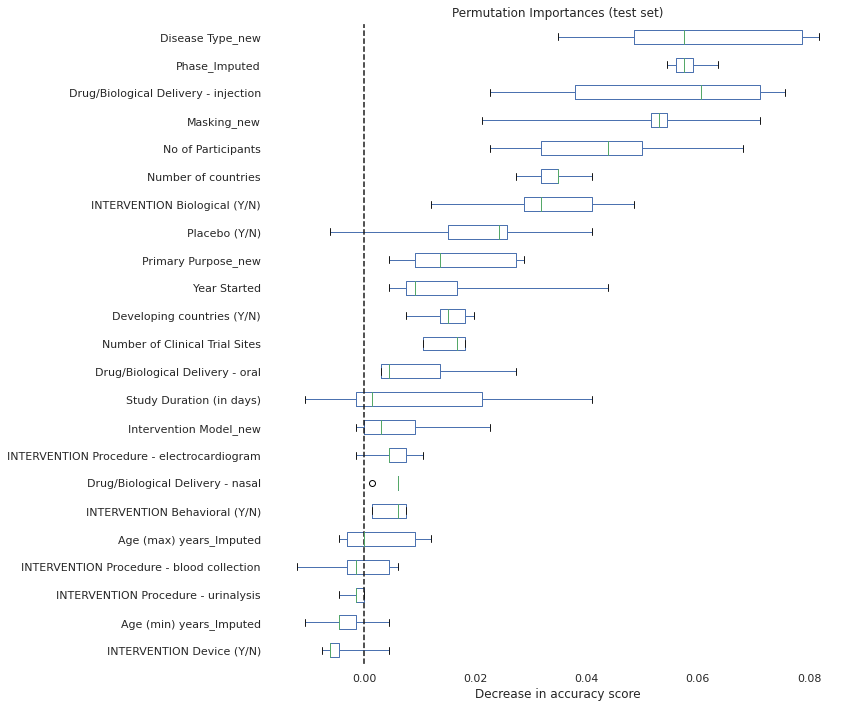

In [168]:
# Compute Feature Permutation Importance in test set

result = permutation_importance(best_model, X_test, y_test,
                          random_state=42)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=features_.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

### 5.9 Confusion Matrix of MVC-RF

In [202]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, test_pred)

array([[[893, 135],
        [ 74,  36]],

       [[579, 229],
        [119, 211]]])

In [204]:
vis_arr=[[[893, 135],
        [ 74,  36]],

       [[579, 229],
        [119, 211]]]

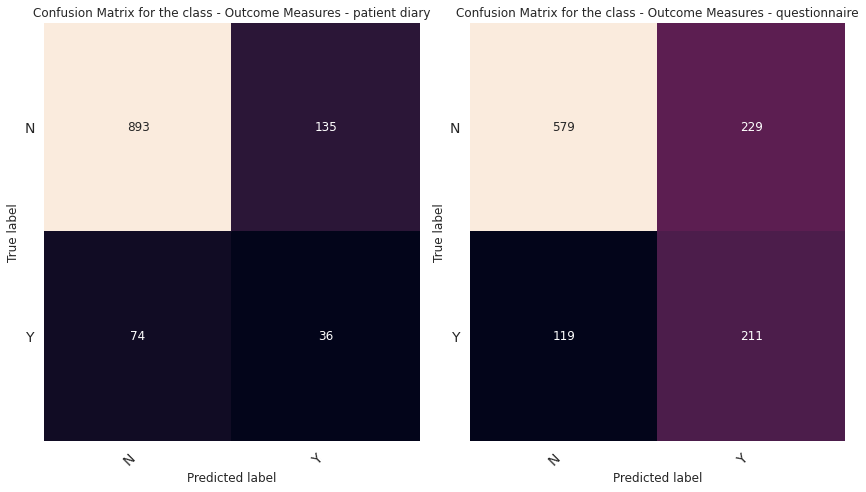

In [205]:
# Plot the confusion matrix of the best performing model
labels = ['Outcome Measures - patient diary','Outcome Measures - questionnaire']

fig, ax = plt.subplots(1,2, figsize = (12, 7))
    
for axes, cfs_matrix, label in zip(ax.flatten(),vis_arr , labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])

fig.tight_layout()
plt.show()